<a href="https://colab.research.google.com/github/MeghanaVandana/Advanced_Mathematical_Statistics/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import (
    anderson, kstest, cramervonmises, shapiro, linregress, probplot
)
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from statsmodels.stats.diagnostic import het_breuschpagan, het_white



In [3]:
data_url = "https://raw.githubusercontent.com/MeghanaVandana/Advanced_Mathematical_Statistics/main/Project2/Crab%20Molt%20Data.csv"

df = pd.read_csv(data_url)
print(df.head(10))
filtered_data_field = df[df['Location'] == 'Field']

   Post-molt  Pre-molt Location
0      127.7     113.6    Field
1      133.2     118.1    Field
2      135.3     119.9    Field
3      143.3     126.2    Field
4      139.3     126.7    Field
5      140.2     127.3    Field
6      143.8     128.2    Field
7      144.6     129.5    Field
8      147.6     130.5    Field
9      144.8     131.6    Field


In [4]:
# ------------------------------------
# Descriptive Statistics (Post-molt)
# ------------------------------------
post_molt_field = filtered_data_field['Post-molt']

print("\n--- FIELD POST-MOLT STATS ---")
print("Max:", post_molt_field.max())
print("Min:", post_molt_field.min())
print("Median:", post_molt_field.median())
print("Mean:", post_molt_field.mean())
print("Std:", post_molt_field.std())
print("Skew:", stats.skew(post_molt_field))
print("Kurtosis:", stats.kurtosis(post_molt_field))


--- FIELD POST-MOLT STATS ---
Max: 166.5
Min: 127.7
Median: 154.0
Mean: 152.96396396396398
Std: 6.7199674348885265
Skew: -1.1190639272668943
Kurtosis: 2.2407060218489283


<Figure size 1000x900 with 0 Axes>

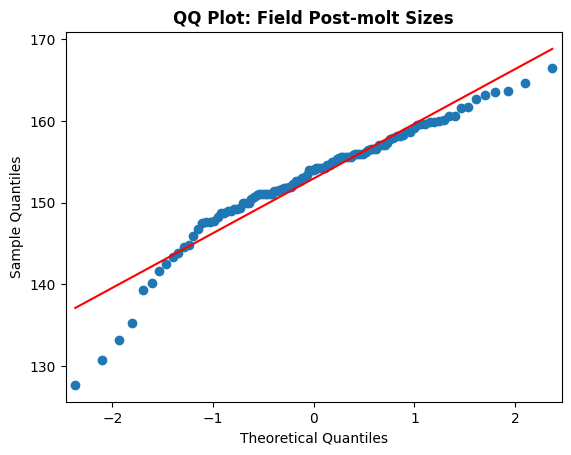


*** FIELD POST-MOLT NORMALITY TESTS ***
Anderson: 1.667443334267034
KS: KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(127.7), statistic_sign=np.int8(-1))
Cramer-von Mises: CramerVonMisesResult(statistic=37.00000000000001, pvalue=0.0)
Shapiro: ShapiroResult(statistic=np.float64(0.9334666723036673), pvalue=np.float64(3.22624163565112e-05))


In [5]:
# ------------------------------------
# QQ Plot (Field Post-molt)
# ------------------------------------
plt.figure(figsize=(10, 9))
sm.qqplot(post_molt_field, line='s')
plt.title("QQ Plot: Field Post-molt Sizes", weight='bold')
plt.show()


# ------------------------------------
# Normality Tests (Field Post-molt)
# ------------------------------------
print("\n*** FIELD POST-MOLT NORMALITY TESTS ***")
print("Anderson:", anderson(post_molt_field).statistic)
print("KS:", kstest(post_molt_field, 'norm'))
print("Cramer-von Mises:", cramervonmises(post_molt_field, 'norm'))
print("Shapiro:", shapiro(post_molt_field))





In [10]:
# ------------------------------------
# Descriptive Statistics (Pre-molt)
# ------------------------------------
pre_molt_field = filtered_data_field['Pre-molt']

print("\n--- FIELD PRE-MOLT STATS ---")
print("Max:", pre_molt_field.max())
print("Min:", pre_molt_field.min())
print("Median:", pre_molt_field.median())
print("Mean:", pre_molt_field.mean())
print("Std:", pre_molt_field.std())
print("Skew:", stats.skew(pre_molt_field))
print("Kurtosis:", stats.kurtosis(pre_molt_field))





--- FIELD PRE-MOLT STATS ---
Max: 153.9
Min: 113.6
Median: 140.1
Mean: 139.00900900900902
Std: 7.251151000164789
Skew: -1.1108752329732858
Kurtosis: 1.7614432515555913


<Figure size 1000x900 with 0 Axes>

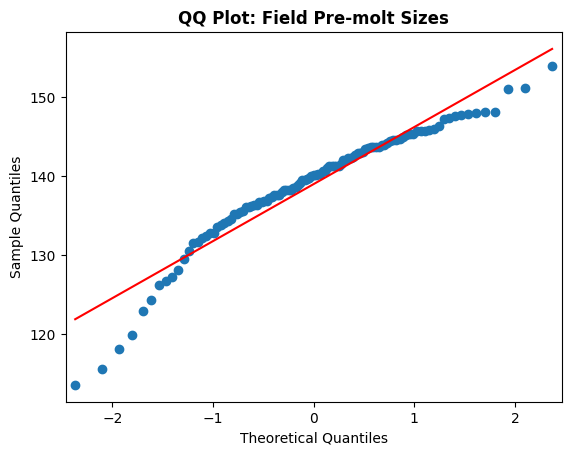

In [11]:
# ------------------------------------
# QQ Plot (Field Pre-molt)
# ------------------------------------
plt.figure(figsize=(10, 9))
sm.qqplot(pre_molt_field, line='s')
plt.title("QQ Plot: Field Pre-molt Sizes", weight='bold')
plt.show()

In [8]:
# ------------------------------------
# Normality Tests (Field Pre-molt)
# ------------------------------------
print("\n*** FIELD PRE-MOLT NORMALITY TESTS ***")
print("Anderson:", anderson(pre_molt_field).statistic)
print("KS:", kstest(pre_molt_field, 'norm'))
print("Cramer-von Mises:", cramervonmises(pre_molt_field, 'norm'))
print("Shapiro:", shapiro(pre_molt_field))






*** FIELD PRE-MOLT NORMALITY TESTS ***
Anderson: 1.899067442726178
KS: KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(113.6), statistic_sign=np.int8(-1))
Cramer-von Mises: CramerVonMisesResult(statistic=37.00000000000001, pvalue=0.0)
Shapiro: ShapiroResult(statistic=np.float64(0.9313224935164637), pvalue=np.float64(2.387389571369571e-05))


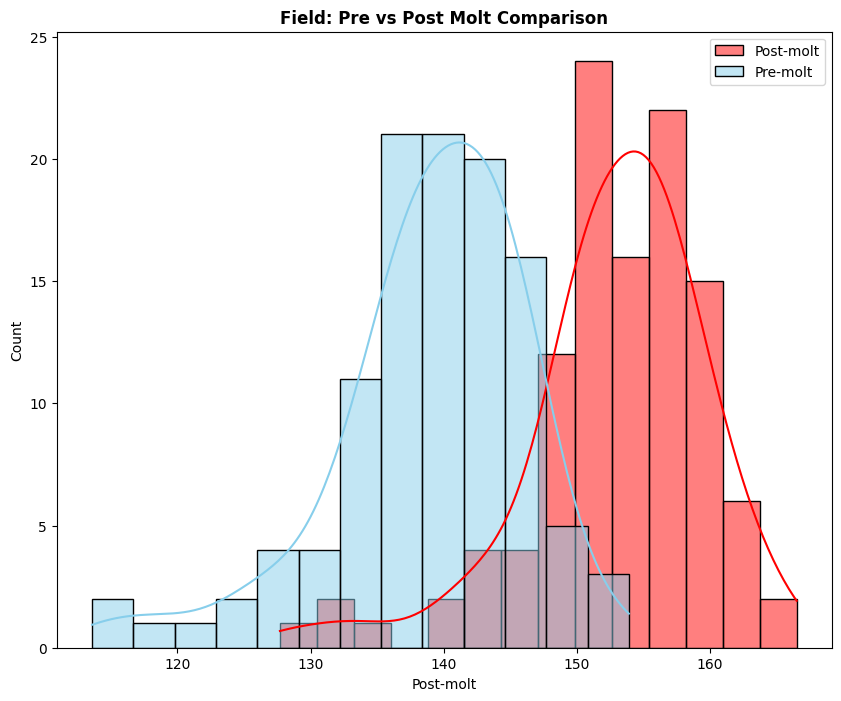

In [9]:
# ------------------------------------
# Histogram Comparison (Field)
# ------------------------------------
plt.figure(figsize=(10, 8))
sns.histplot(post_molt_field, kde=True, label='Post-molt', color='red')
sns.histplot(pre_molt_field, kde=True, label='Pre-molt', color='skyblue')
plt.title("Field: Pre vs Post Molt Comparison", weight='bold')
plt.legend()
plt.show()

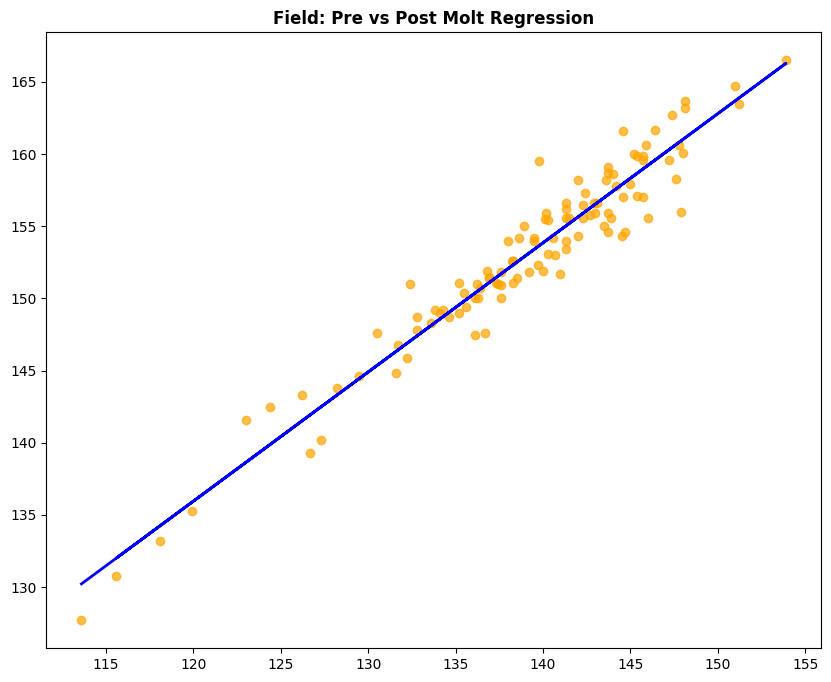


Field Regression Summary:
                            OLS Regression Results                            
Dep. Variable:              Post-molt   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1512.
Date:                Mon, 24 Nov 2025   Prob (F-statistic):           9.94e-66
Time:                        22:43:52   Log-Likelihood:                -218.63
No. Observations:                 111   AIC:                             441.3
Df Residuals:                     109   BIC:                             446.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5436    

In [12]:

# ------------------------------------
# Scatter Plot + Regression (Field)
# ------------------------------------
plt.figure(figsize=(10, 8))
plt.scatter(pre_molt_field, post_molt_field, color='orange', alpha=0.7)
X = sm.add_constant(pre_molt_field)
model_field = sm.OLS(post_molt_field, X).fit()
plt.plot(pre_molt_field, model_field.predict(X), color='blue', linewidth=2)
plt.title("Field: Pre vs Post Molt Regression", weight='bold')
plt.show()

print("\nField Regression Summary:")
print(model_field.summary())



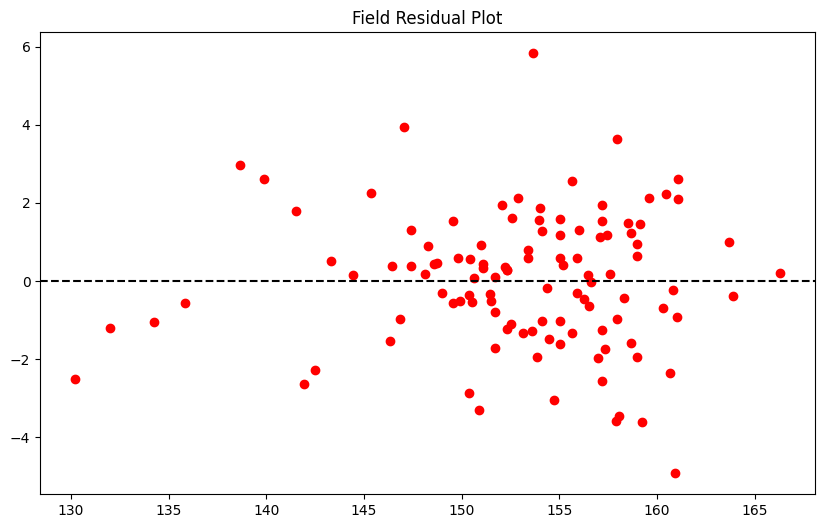


Field Residual Normality:
KS: KstestResult(statistic=np.float64(0.14036884686862783), pvalue=np.float64(0.022695786883318934), statistic_location=np.float64(1.126857235212583), statistic_sign=np.int8(-1))
Shapiro: ShapiroResult(statistic=np.float64(0.9917771230472963), pvalue=np.float64(0.7482347049933264))


In [13]:

# ------------------------------------
# Residual Analysis (Field)
# ------------------------------------
pred_field = model_field.predict(X)
resid_field = post_molt_field - pred_field

plt.figure(figsize=(10, 6))
plt.scatter(pred_field, resid_field, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title("Field Residual Plot")
plt.show()

print("\nField Residual Normality:")
print("KS:", kstest(resid_field, 'norm'))
print("Shapiro:", shapiro(resid_field))

In [14]:
# ------------------------------------
# Heteroskedasticity Tests (Field)
# ------------------------------------
bp_stat, bp_p, _, _ = het_breuschpagan(resid_field, X)
white_stat, white_p, _, _ = het_white(resid_field, X)

print("\nBreusch–Pagan:", bp_stat, bp_p)
print("White Test:", white_stat, white_p)





Breusch–Pagan: 0.2096347735817996 0.6470538154013719
White Test: 1.2652131111788358 0.5312053785496686



--- LAB POST-MOLT STATS ---
Max: 166.8
Min: 38.8
Mean: 141.10997229916896
Median: 143.7
Std: 15.280779875724328
Skew: -2.2881145615037486
Kurtosis: 9.442201794919175


<Figure size 1000x900 with 0 Axes>

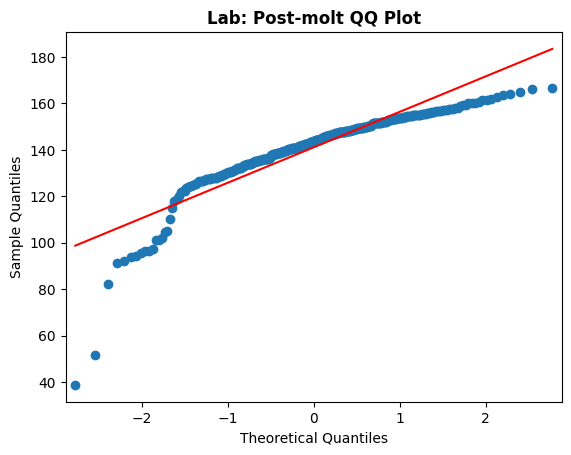


Lab Post-molt Normality Tests:
Anderson: 10.758090987208561
KS: KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(38.8), statistic_sign=np.int8(-1))
CVM: CramerVonMisesResult(statistic=120.33333333333333, pvalue=0.0)
Shapiro: ShapiroResult(statistic=np.float64(0.8333079256419077), pvalue=np.float64(4.628040046363554e-19))


In [15]:
# ============================================================
#                   LAB LOCATION ANALYSIS
# ============================================================

filtered_data_lab = df[df['Location'] == 'Lab']

post_molt_lab = filtered_data_lab['Post-molt']
pre_molt_lab = filtered_data_lab['Pre-molt']

# ------------------------------------
# Lab Stats
# ------------------------------------
print("\n--- LAB POST-MOLT STATS ---")
print("Max:", post_molt_lab.max())
print("Min:", post_molt_lab.min())
print("Mean:", post_molt_lab.mean())
print("Median:", post_molt_lab.median())
print("Std:", post_molt_lab.std())
print("Skew:", stats.skew(post_molt_lab))
print("Kurtosis:", stats.kurtosis(post_molt_lab))

# QQ Plot
plt.figure(figsize=(10, 9))
sm.qqplot(post_molt_lab, line='s')
plt.title("Lab: Post-molt QQ Plot", weight='bold')
plt.show()

print("\nLab Post-molt Normality Tests:")
print("Anderson:", anderson(post_molt_lab).statistic)
print("KS:", kstest(post_molt_lab, 'norm'))
print("CVM:", cramervonmises(post_molt_lab, 'norm'))
print("Shapiro:", shapiro(post_molt_lab))



--- LAB PRE-MOLT STATS ---
Min: 31.1
Max: 155.1
Mean: 126.19944598337948
Median: 128.9


<Figure size 1000x900 with 0 Axes>

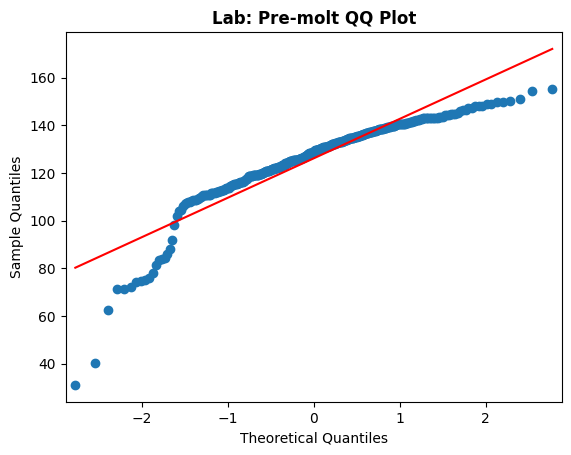


Lab Pre-molt Normality Tests:
Anderson: 9.255798135902864
KS: KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(31.1), statistic_sign=np.int8(-1))
CVM: CramerVonMisesResult(statistic=120.33333333333333, pvalue=0.0)
Shapiro: ShapiroResult(statistic=np.float64(0.8615104215794123), pvalue=np.float64(2.1427046241940032e-17))


In [16]:
# ------------------------------------
# Lab Pre-molt Stats
# ------------------------------------
print("\n--- LAB PRE-MOLT STATS ---")
print("Min:", pre_molt_lab.min())
print("Max:", pre_molt_lab.max())
print("Mean:", pre_molt_lab.mean())
print("Median:", pre_molt_lab.median())

plt.figure(figsize=(10, 9))
sm.qqplot(pre_molt_lab, line='s')
plt.title("Lab: Pre-molt QQ Plot", weight='bold')
plt.show()

print("\nLab Pre-molt Normality Tests:")
print("Anderson:", anderson(pre_molt_lab).statistic)
print("KS:", kstest(pre_molt_lab, 'norm'))
print("CVM:", cramervonmises(pre_molt_lab, 'norm'))
print("Shapiro:", shapiro(pre_molt_lab))

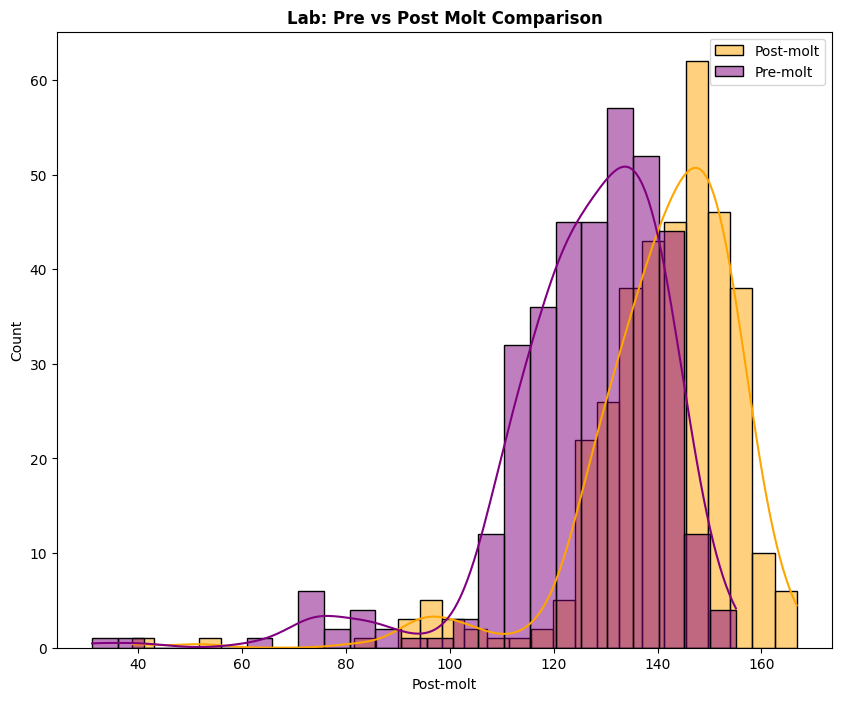

In [17]:

# ------------------------------------
# Histogram Comparison (Lab)
# ------------------------------------
plt.figure(figsize=(10, 8))
sns.histplot(post_molt_lab, kde=True, label='Post-molt', color='orange')
sns.histplot(pre_molt_lab, kde=True, label='Pre-molt', color='purple')
plt.legend()
plt.title("Lab: Pre vs Post Molt Comparison", weight='bold')
plt.show()

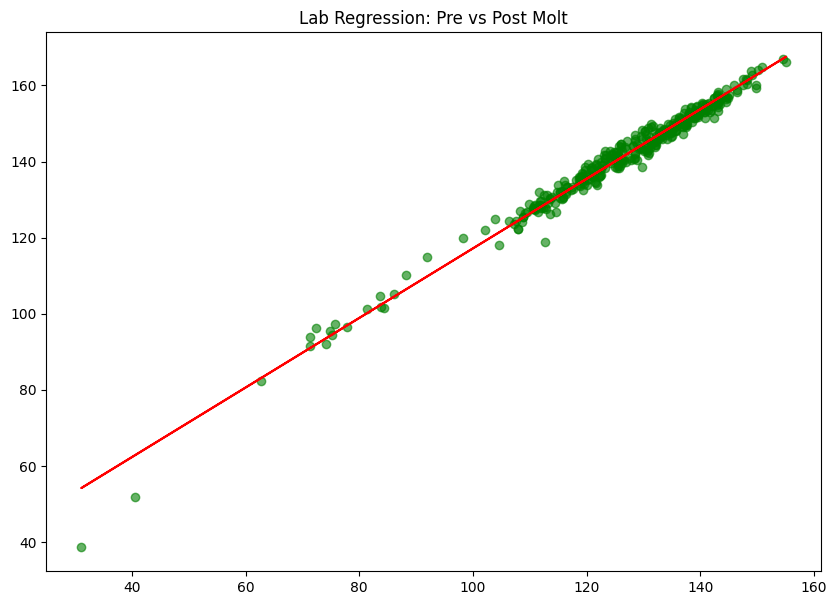


Lab Regression Summary:
                            OLS Regression Results                            
Dep. Variable:              Post-molt   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.853e+04
Date:                Mon, 24 Nov 2025   Prob (F-statistic):          4.67e-311
Time:                        22:44:22   Log-Likelihood:                -780.67
No. Observations:                 361   AIC:                             1565.
Df Residuals:                     359   BIC:                             1573.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8319      

In [18]:
# ------------------------------------
# Regression (Lab)
# ------------------------------------
X_lab = sm.add_constant(pre_molt_lab)
model_lab = sm.OLS(post_molt_lab, X_lab).fit()

plt.figure(figsize=(10, 7))
plt.scatter(pre_molt_lab, post_molt_lab, color='green', alpha=0.6)
plt.plot(pre_molt_lab, model_lab.predict(X_lab), color='red')
plt.title("Lab Regression: Pre vs Post Molt")
plt.show()

print("\nLab Regression Summary:")
print(model_lab.summary())

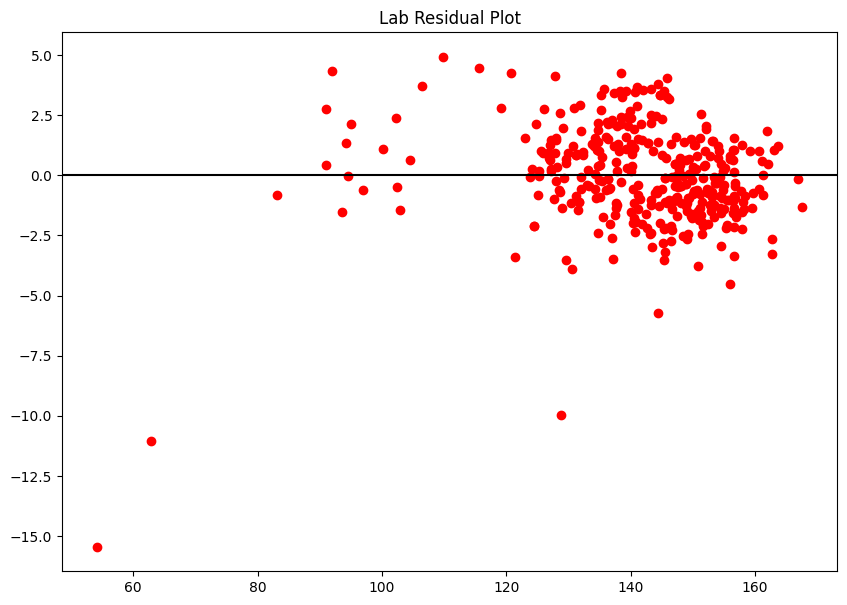


Lab Residual Normality:
KS: KstestResult(statistic=np.float64(0.1543914670111599), pvalue=np.float64(5.575828070134604e-08), statistic_location=np.float64(1.2183973236578822), statistic_sign=np.int8(-1))
Shapiro: ShapiroResult(statistic=np.float64(0.8977775672907583), pvalue=np.float64(7.604759167735644e-15))


In [19]:

# ------------------------------------
# Residual Analysis (Lab)
# ------------------------------------
resid_lab = post_molt_lab - model_lab.predict(X_lab)

plt.figure(figsize=(10, 7))
plt.scatter(model_lab.predict(X_lab), resid_lab, color='red')
plt.axhline(0, color='black')
plt.title("Lab Residual Plot")
plt.show()

print("\nLab Residual Normality:")
print("KS:", kstest(resid_lab, 'norm'))
print("Shapiro:", shapiro(resid_lab))



In [20]:
# ------------------------------------
# Heteroskedasticity Tests (Lab)
# ------------------------------------
bp_stat_lab, bp_p_lab, _, _ = het_breuschpagan(resid_lab, X_lab)
white_stat_lab, white_p_lab, _, _ = het_white(resid_lab, X_lab)

print("\nBreusch–Pagan (Lab):", bp_stat_lab, bp_p_lab)
print("White Test (Lab):", white_stat_lab, white_p_lab)



Breusch–Pagan (Lab): 60.250628973994914 8.351614131360776e-15
White Test (Lab): 168.61301865187127 2.4330341864269923e-37


In [21]:
# ============================================================
#     COMBINED MODEL + CROSS VALIDATION (LAB + FIELD)
# ============================================================

post_combined = pd.concat([post_molt_field, post_molt_lab])
pre_combined = pd.concat([pre_molt_field, pre_molt_lab])

combined_data = pd.DataFrame({
    "Post": post_combined,
    "Pre": pre_combined
})

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

all_preds = []
all_true = []

for train_idx, test_idx in kfold.split(combined_data):
    train = combined_data.iloc[train_idx]
    test = combined_data.iloc[test_idx]

    X_train = sm.add_constant(train["Post"])
    X_test = sm.add_constant(test["Post"])

    model = sm.OLS(train["Pre"], X_train).fit()

    preds = model.predict(X_test)

    all_preds.extend(list(preds))
    all_true.extend(list(test["Pre"]))

r2 = r2_score(all_true, all_preds)

print("\nCross-validation R²:", r2)



Cross-validation R²: 0.9799396959619162
